In [1]:
import numpy as np
from astropy import units as u
from astropy.table import Table, Row

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
vega_V = 1e6 / u.cm**2 / u.second / (1000*u.Angstrom)
vega_V

<Quantity 1000. 1 / (Angstrom cm2 s)>

In [3]:
pixel_scale = 0.18 * u.arcsec
aperture = np.pi*(5*u.meter)**2
exptime = 300*u.second
throughput = 0.75 * u.electron/u.photon
filter_bandpass = 80*u.Angstrom

# Dark (20th %ile)

http://www.gemini.edu/sciops/telescopes-and-sites/observing-condition-constraints/optical-sky-background

In [4]:
sky_brightness_dark = vega_V * 10**(-21.3/2.5) / u.arcsec**2 * u.photon
sky_brightness_dark

<Quantity 3.01995172e-06 ph / (Angstrom arcsec2 cm2 s)>

In [5]:
sky_counts_dark = throughput*sky_brightness_dark*pixel_scale**2 * aperture.to(u.cm**2) * filter_bandpass * exptime
print(f"Sky Counts Estimate = {sky_counts_dark:.0f}")

Sky Counts Estimate = 1383 electron


In [6]:
print(f"Sky Noise Estimate = {sky_counts_dark**0.5:.0f}")

Sky Noise Estimate = 37 electron(1/2)


# Gray (50th %ile)

In [7]:
sky_brightness_gray = vega_V * 10**(-20.7/2.5) / u.arcsec**2 * u.photon
sky_brightness_gray

<Quantity 5.2480746e-06 ph / (Angstrom arcsec2 cm2 s)>

In [8]:
sky_counts_gray = throughput*sky_brightness_gray*pixel_scale**2 * aperture.to(u.cm**2) * filter_bandpass * exptime
print(f"Sky Counts Estimate = {sky_counts_gray:.0f}")

Sky Counts Estimate = 2404 electron


In [9]:
print(f"Sky Noise Estimate = {sky_counts_gray**0.5:.0f}")

Sky Noise Estimate = 49 electron(1/2)


# Bright (80th %ile)

In [10]:
sky_brightness_bright = vega_V * 10**(-19.5/2.5) / u.arcsec**2 * u.photon
sky_brightness_bright

<Quantity 1.58489319e-05 ph / (Angstrom arcsec2 cm2 s)>

In [11]:
sky_counts_bright = throughput*sky_brightness_bright*pixel_scale**2 * aperture.to(u.cm**2) * filter_bandpass * exptime
print(f"Sky Counts Estimate = {sky_counts_bright:.0f}")

Sky Counts Estimate = 7260 electron


In [12]:
print(f"Sky Noise Estimate = {sky_counts_bright**0.5:.0f}")

Sky Noise Estimate = 85 electron(1/2)


# Sky Spectrum

In [13]:
t = Table.read('skybg_50_10.dat', format='ascii')

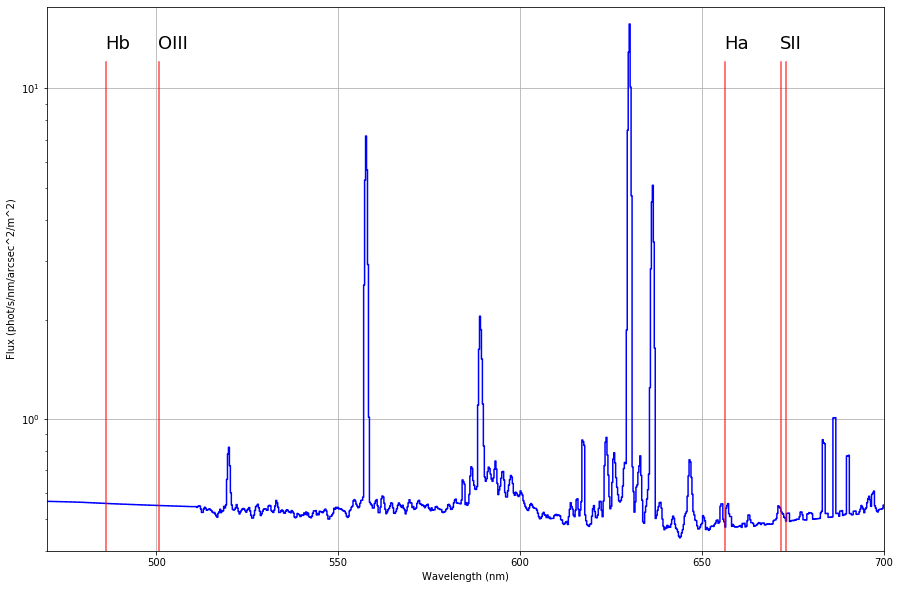

In [14]:
lines_labels = ['Ha', 'SII', '', 'Hb', 'OIII']
lines = [656.3, 671.6, 673.1, 486.1, 500.7]
x1 = 470
x2 = 700
y1 = 0.4
y2 = 1.1*np.ceil(max(t[(t['nm'] > x1) & (t['nm'] < x2)]['phot/s/nm/arcsec^2/m^2']))

plt.figure(figsize=(15,10))
plt.plot(t['nm'], t['phot/s/nm/arcsec^2/m^2'], 'b-', drawstyle='steps-mid')
for i,line in enumerate(lines):
    if line > x1 and line < x2:
        plt.axvline(line, color='r', ymax=0.9, alpha=0.7)
        plt.text(line-0.2, y2*0.75, lines_labels[i], fontsize=18)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (phot/s/nm/arcsec^2/m^2)')
plt.grid()
plt.xlim(x1,x2)
plt.ylim(y1,y2)
plt.yscale('log')
plt.show()

In [15]:
# Around H-alpha
filter_bandpass = 80*u.Angstrom
central_wavelength = 6563 * u.Angstrom
w1 = central_wavelength.to(u.nm).value - filter_bandpass.to(u.nm).value/2
w2 = central_wavelength.to(u.nm).value + filter_bandpass.to(u.nm).value/2
i1 = np.argmin(abs(t['nm'] - w1))
i2 = np.argmin(abs(t['nm'] - w2))

sky_flux = 0
for i in range(i1, i2):
#     print(i, t[i]['nm'], t[i]['phot/s/nm/arcsec^2/m^2'])
    sky_flux += t[i]['phot/s/nm/arcsec^2/m^2'] * (t[i+1]['nm'] - t[i]['nm'])
sky_flux *= u.photon / u.second / u.arcsec**2 / u.meter**2
sky_flux *= aperture
sky_flux *= pixel_scale**2
sky_flux *= exptime
sky_flux *= throughput
print(f"Bandpass: {t['nm'][i1]:.2f} to {t['nm'][i2]:.2f} = {t['nm'][i2]-t['nm'][i1]:.2f} nm")
print(f"Sky Flux: {sky_flux:.2f}")
print(f"Sky Noise: {sky_flux**0.5:.1f}")
print(f"Sky Noise Scaled to Dark Time: {(sky_flux*sky_counts_dark/sky_counts_gray)**0.5:.1f}")

Bandpass: 652.39 to 660.35 = 7.96 nm
Sky Flux: 2265.12 electron
Sky Noise: 47.6 electron(1/2)
Sky Noise Scaled to Dark Time: 36.1 electron(1/2)


In [16]:
# Around OIII
filter_bandpass = 80*u.Angstrom
central_wavelength = 5007 * u.Angstrom
w1 = central_wavelength.to(u.nm).value - filter_bandpass.to(u.nm).value/2
w2 = central_wavelength.to(u.nm).value + filter_bandpass.to(u.nm).value/2
i1 = np.argmin(abs(t['nm'] - w1))
i2 = np.argmin(abs(t['nm'] - w2))

sky_flux = 0
for i in range(i1, i2):
#     print(i, t[i]['nm'], t[i]['phot/s/nm/arcsec^2/m^2'])
    sky_flux += t[i]['phot/s/nm/arcsec^2/m^2'] * (t[i+1]['nm'] - t[i]['nm'])
sky_flux *= u.photon / u.second / u.arcsec**2 / u.meter**2
sky_flux *= aperture
sky_flux *= pixel_scale**2
sky_flux *= exptime
sky_flux *= throughput
print(f"Bandpass: {t['nm'][i1]:.2f} to {t['nm'][i2]:.2f} = {t['nm'][i2]-t['nm'][i1]:.2f} nm")
print(f"Sky Flux: {sky_flux:.2f}")
print(f"Sky Noise: {sky_flux**0.5:.1f}")
print(f"Sky Noise Scaled to Dark Time: {(sky_flux*sky_counts_dark/sky_counts_gray)**0.5:.1f}")

Bandpass: 496.63 to 504.59 = 7.96 nm
Sky Flux: 2499.53 electron
Sky Noise: 50.0 electron(1/2)
Sky Noise Scaled to Dark Time: 37.9 electron(1/2)


In [17]:
# Around H-beta
filter_bandpass = 80*u.Angstrom
central_wavelength = 4661 * u.Angstrom
w1 = central_wavelength.to(u.nm).value - filter_bandpass.to(u.nm).value/2
w2 = central_wavelength.to(u.nm).value + filter_bandpass.to(u.nm).value/2
i1 = np.argmin(abs(t['nm'] - w1))
i2 = np.argmin(abs(t['nm'] - w2))

sky_flux = 0
for i in range(i1, i2):
#     print(i, t[i]['nm'], t[i]['phot/s/nm/arcsec^2/m^2'])
    sky_flux += t[i]['phot/s/nm/arcsec^2/m^2'] * (t[i+1]['nm'] - t[i]['nm'])
sky_flux *= u.photon / u.second / u.arcsec**2 / u.meter**2
sky_flux *= aperture
sky_flux *= pixel_scale**2
sky_flux *= exptime
sky_flux *= throughput
print(f"Bandpass: {t['nm'][i1]:.2f} to {t['nm'][i2]:.2f} = {t['nm'][i2]-t['nm'][i1]:.2f} nm")
print(f"Sky Flux: {sky_flux:.2f}")
print(f"Sky Noise: {sky_flux**0.5:.1f}")
print(f"Sky Noise Scaled to Dark Time: {(sky_flux*sky_counts_dark/sky_counts_gray)**0.5:.1f}")

Bandpass: 462.14 to 470.10 = 7.96 nm
Sky Flux: 2581.12 electron
Sky Noise: 50.8 electron(1/2)
Sky Noise Scaled to Dark Time: 38.5 electron(1/2)


# Wavelength Shift for Converging Beam

lambda_c = lambda_0 (1 - sin(theta)^2/n^2)^0.5

In [18]:
n = 1.51 # BK7 is 1.51, Sapphire is 1.76
Fratio = 2
lambda0 = 6562.8 * u.Angstrom

In [19]:
half_angle_Fratio = np.arctan(1/Fratio/2)*u.radian

In [20]:
edge_lambda = lambda0 * (1 - np.sin(half_angle_Fratio.value)**2 / n**2)**0.5
lambda0 - edge_lambda

<Quantity 85.2088896 Angstrom>

In [21]:
def annular_area(r, dr=0.1):
    return np.pi*( (r+dr)**2 - r**2 )

In [22]:
dr = 0.05
Fratio = 2
fl = 10*Fratio
tc = Table(names=('Lambda', 'A'), dtype=('f4', 'f4'))
for r in np.arange(0.18, 1+dr, dr):
    A = annular_area(r, dr)
    HA = np.arctan(r/fl)
    lc = lambda0 * (1 - np.sin(HA)**2 / n**2)**0.5
    tc.add_row({'Lambda': lc, 'A':A})
tc['A'] /= max(tc['A'])

In [23]:
# plt.figure(figsize=(10,15))
# plt.plot(tc['Lambda'], tc['A'])
# plt.show()

From
http://www.ing.iac.es/astronomy/instruments/cenwave_shift.php

lambda - lambda0 = lambda0/2 * ( (n**2-sin(theta)**2)/n - 1 )

In [24]:
dlam = lambda0/2 * ( (n**2-np.sin(half_angle_Fratio)**2)**0.5/n - 1 )
dlam

<Quantity -42.6044448 Angstrom>

In [25]:
half_angle_Fratio*180/np.pi

<Quantity 14.03624347 rad>